<a href="https://colab.research.google.com/github/lunecarvalho/comment-rating-classification/blob/main/comment_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
df = pd.read_csv('/content/dataset_avaliacoes.csv')

In [30]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento  
0   positivo  
1   negativo  
2   negativo  
3   positivo  
4   positivo

In [31]:
df.shape

(15501, 4)

In [32]:
df.value_counts('sentimento')

sentimento
positivo    7890
negativo    7611
Name: count, dtype: int64

In [33]:
print('positiva \n')
df.avaliacao[0]

positiva 



'Esse smartphone superou minhas expectativas, recomendo'

In [34]:
print('negativa \n')
df.avaliacao[2]

negativa 



'Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra.'

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

texto = ['Comprei um produto ótimo', 'Comprei um produto ruim']

vetorizar = CountVectorizer()
bag_of_words = vetorizar.fit_transform(texto)

In [36]:
bag_of_words

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8 stored elements and shape (2, 5)>

In [37]:
matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [38]:
matriz_esparsa

comprei  produto  ruim  um  ótimo
0        1        1     0   1      1
1        1        1     1   1      0

In [39]:
vetorizar = CountVectorizer(lowercase=False)
bag_of_words = vetorizar.fit_transform(df.avaliacao)
print(bag_of_words.shape)

(15501, 23352)


In [40]:
vetorizar = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vetorizar.fit_transform(df.avaliacao)
print(bag_of_words.shape)

(15501, 50)


In [41]:
matriz_esparsa_avaliacoes = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names_out())

In [42]:
matriz_esparsa_avaliacoes

Não  Produto  ainda  antes  as  até  bem  bom  chegou  com  ...  \
0        0        0      0      0   0    0    0    0       0    0  ...   
1        0        0      0      0   0    0    0    0       0    0  ...   
2        0        0      0      0   0    0    0    0       0    0  ...   
3        0        0      0      0   0    0    0    0       0    0  ...   
4        0        0      0      0   0    0    1    0       0    0  ...   
...    ...      ...    ...    ...  ..  ...  ...  ...     ...  ...  ...   
15496    0        0      0      0   0    0    0    0       0    0  ...   
15497    0        0      0      0   0    0    0    0       0    0  ...   
15498    0        0      0      0   0    0    0    0       0    0  ...   
15499    0        1      0      1   0    0    0    1       1    0  ...   
15500    0        0      0      0   0    0    0    0       0    0  ...   

       qualidade  que  recebi  recomendo  se  sem  tem  um  uma  veio  
0              0    0       0          1   0    0    0   0    0     0  
1              0    0       0          0   1    0    0   0    0     0  
2              0    0       0          0   0    0    0   0    0     0  
3              0    1       0          0   0    0    0   0    0     0  
4              1    2       0          0   0    0    0   0    0     0  
...          ...  ...     ...        ...  ..  ...  ...  ..  ...   ...  
15496          0    0       0          1   0    0    0   0    0     0  
15497          0    1       0          0   0    0    1   0    0     0  
15498          0    0       0          0   0    0    0   1    0     0  
15499          0    0       0          0   0    0    0   0    0     0  
15500          0    0       0          0   0    0    0   0    0     0  

[15501 rows x 50 columns]

In [43]:
from sklearn.model_selection import train_test_split
x_treino, x_teste, y_treino, y_teste = train_test_split(bag_of_words, df.sentimento, random_state = 4978)

In [44]:
from sklearn.linear_model import LogisticRegression
regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_treino, y_treino)
acuracia = regressao_logistica.score(x_teste, y_teste)
print(acuracia)

0.7982456140350878


In [45]:
from wordcloud import WordCloud

In [46]:
todas_palavras = [texto for texto in df.avaliacao]

In [47]:
todas_palavras = ' '.join([texto for texto in df.avaliacao])

In [48]:
todas_palavras

'Esse smartphone superou minhas expectativas, recomendo o cheiro e muito desagradavel!! pra quem se incomoda  nao recomendoo.. Eu fiz a compra a loja não entregou o produto, a compra foi feita no cartão de credito e ate o momento a loja também nao me devolveu o valor da compra. Atendeu minhas expectativas, só achei a luz ruim, mas nada que dificulte seu funcionamento. Gostei muito, só achei que ficou a desejar a qualidade das fotos. Achei que fosse bem melhor . Comprei o produto e ñ tinha para entrega isso não foi legal!!!!!! o produto pode até ser bom ,mais só posso avalia-lo depois que for feito a troca para eu usa-lo, pois estou esperando a troca ser feita o que recebi veio quebrado já enviei duas reclamações, mas não obtive resposta. recebi o produto quebrado e quero que seja enviado outro. estou no aguardo para saber o que fazer. att. Cármen nao recebi o produto, pois voces nao cumpriram o compromisso firmado de entregar ate hoje 23/05/18. PESSIMA LOGISTICA. Ja solicitei o cancela

In [49]:
nuvem_palavras = WordCloud().generate(todas_palavras)

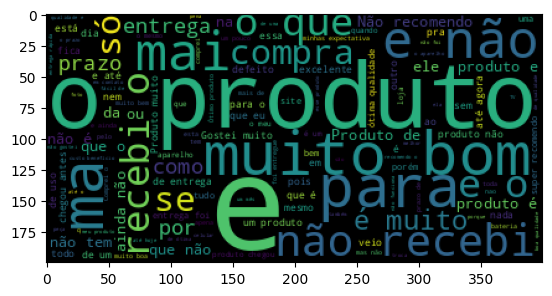

In [50]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(nuvem_palavras)
plt.show()

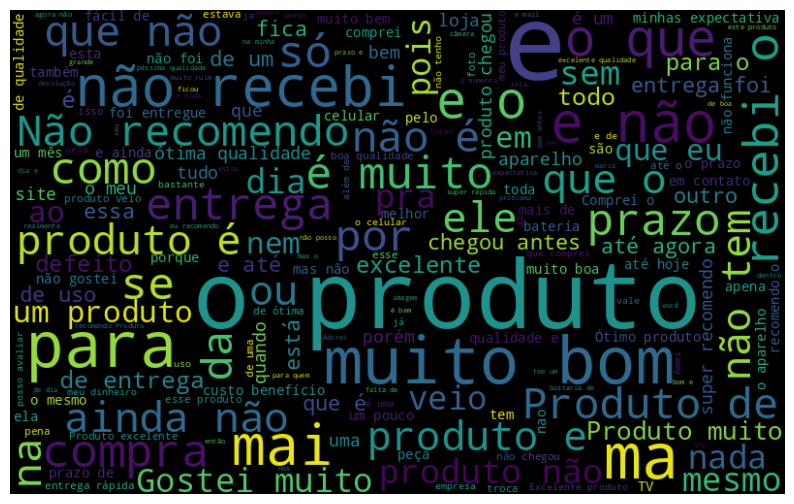

In [51]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110).generate(todas_palavras)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

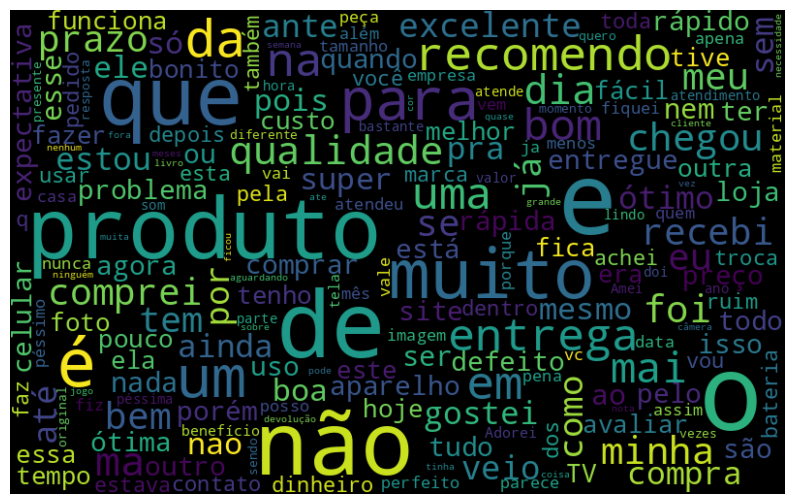

In [52]:
nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(todas_palavras)
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

In [53]:
def nuvem_palavras(texto, coluna_texto, sentimento):
  texto_sentimento = texto.query(f"sentimento =='{sentimento}'")[coluna_texto]

  texto_unido = ' '.join(texto_sentimento)

  nuvem_palavras = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(texto_unido)
  plt.figure(figsize=(10,7))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

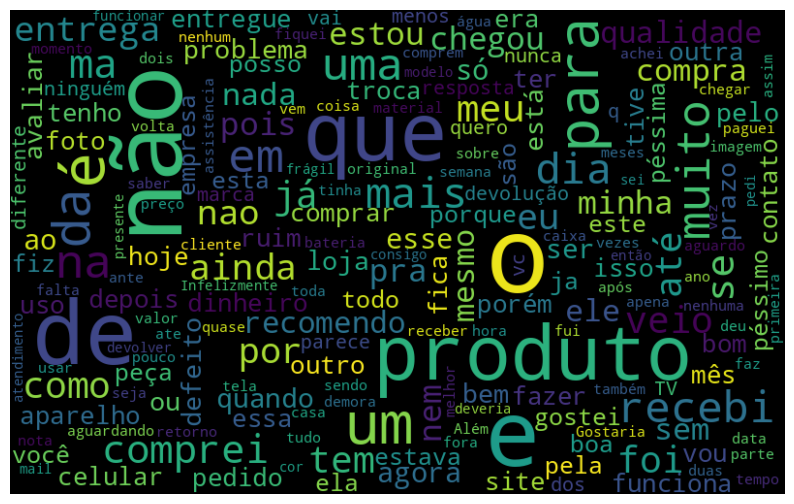

In [54]:
nuvem_palavras(df, 'avaliacao', 'negativo')

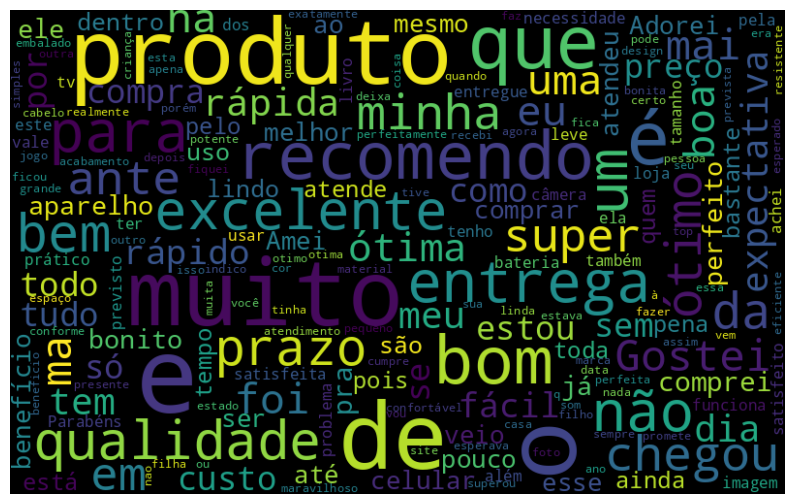

In [55]:
nuvem_palavras(df, 'avaliacao', 'positivo')

In [56]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

In [59]:
from nltk import tokenize
# Example
frase = 'O produto é excelente e a entrega foi muito rápida!'
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(frase)
print(token_frase)

['O', 'produto', 'é', 'excelente', 'e', 'a', 'entrega', 'foi', 'muito', 'rápida!']


In [60]:
token_frase = token_espaco.tokenize(todas_palavras)

In [62]:
frequencia = nltk.FreqDist(token_frase)
frequencia

FreqDist({'e': 11813, 'o': 10865, 'de': 10280, 'a': 8873, 'que': 7657, 'não': 7286, 'é': 4786, 'produto': 4765, 'com': 4641, 'do': 4583, ...})

In [63]:
df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                              'Frequência': list(frequencia.values())})

In [64]:
df_frequencia.head()

Palavra  Frequência
0           Esse         101
1     smartphone          33
2        superou          90
3         minhas         533
4  expectativas,          79

In [65]:
df_frequencia.nlargest(columns='Frequência', n=10)

Palavra  Frequência
8          e       11813
6          o       10865
29        de       10280
19         a        8873
46       que        7657
22       não        7286
163        é        4786
63   produto        4765
177      com        4641
130       do        4583

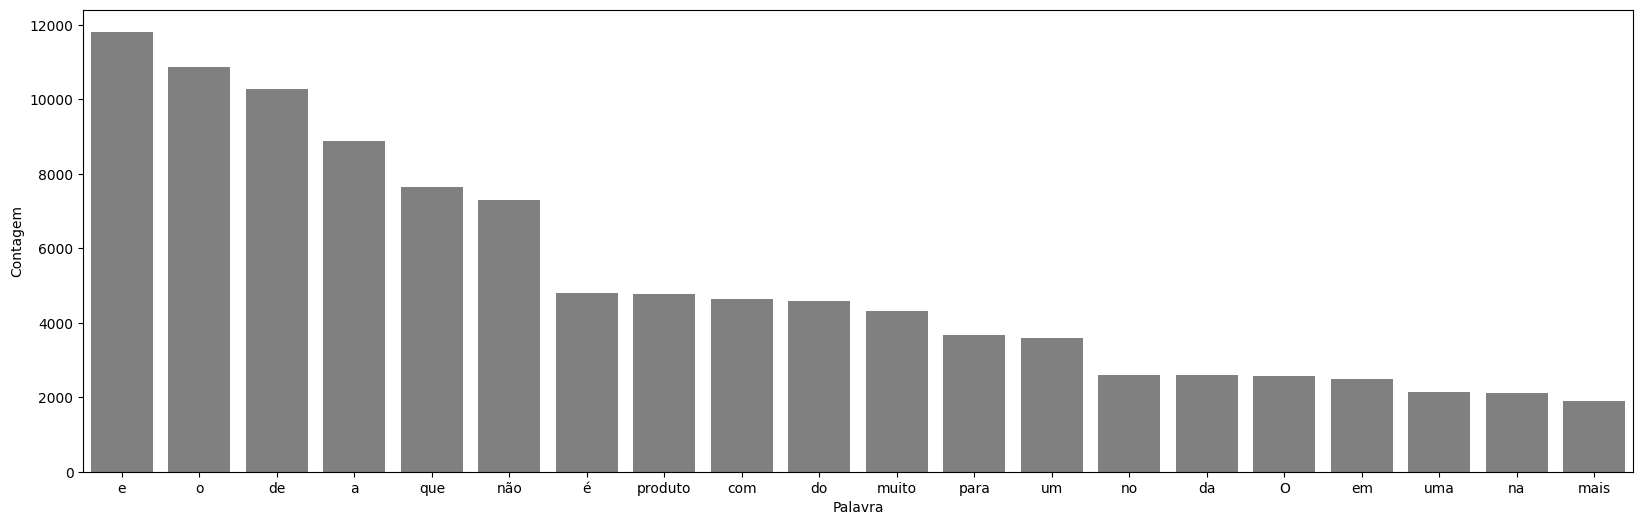

In [66]:
import seaborn as sns

plt.figure(figsize=(20,6))
ax = sns.barplot(data=df_frequencia.nlargest(columns='Frequência', n=20), x='Palavra', y='Frequência', color='grey')
ax.set(ylabel='Contagem')
plt.show()

In [67]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')

In [68]:
palavras_irrelevantes

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as',
 'às',
 'até',
 'com',
 'como',
 'da',
 'das',
 'de',
 'dela',
 'delas',
 'dele',
 'deles',
 'depois',
 'do',
 'dos',
 'e',
 'é',
 'ela',
 'elas',
 'ele',
 'eles',
 'em',
 'entre',
 'era',
 'eram',
 'éramos',
 'essa',
 'essas',
 'esse',
 'esses',
 'esta',
 'está',
 'estamos',
 'estão',
 'estar',
 'estas',
 'estava',
 'estavam',
 'estávamos',
 'este',
 'esteja',
 'estejam',
 'estejamos',
 'estes',
 'esteve',
 'estive',
 'estivemos',
 'estiver',
 'estivera',
 'estiveram',
 'estivéramos',
 'estiverem',
 'estivermos',
 'estivesse',
 'estivessem',
 'estivéssemos',
 'estou',
 'eu',
 'foi',
 'fomos',
 'for',
 'fora',
 'foram',
 'fôramos',
 'forem',
 'formos',
 'fosse',
 'fossem',
 'fôssemos',
 'fui',
 'há',
 'haja',
 'hajam',
 'hajamos',
 'hão',
 'havemos',
 'haver',
 'hei',
 'houve',
 'houvemos',
 'houver',
 'houvera',
 'houverá',
 'houveram',
 'houvéramos',
 'houverão',
 'houverei',
 'houverem',
 'hou

In [69]:
frase_processada = []

for opiniao in df.avaliacao:
  palavras_texto = token_espaco.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in palavras_irrelevantes]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_1'] = frase_processada

In [70]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  
0   positivo    Esse smartphone superou expectativas, recomendo  
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...  
2   negativo  Eu fiz compra loja entregou produto, compra fe...  
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...  
4   positivo  Gostei muito, achei ficou desejar qualidade fo...

In [71]:
df['avaliacao'][0]

'Esse smartphone superou minhas expectativas, recomendo'

In [72]:
df['tratamento_1'][0]

'Esse smartphone superou expectativas, recomendo'

In [119]:
def classificar_texto(texto, coluna_texto, coluna_classificacao):
  vetorizar = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
  x_treino, x_teste, y_treino, y_teste = train_test_split(bag_of_words, texto[coluna_classificacao], random_state=4978)
  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(x_treino, y_treino)
  acuracia = regressao_logistica.score(x_teste, y_teste)
  return print(f"Acurácia do modelo com '{coluna_texto}': {acuracia * 100:.2f}%")

In [120]:
classificar_texto(df, 'tratamento_1', 'sentimento')

Acurácia do modelo com 'tratamento_1': 81.09%


In [77]:
def grafico_frequencia(texto, coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
  token_espaco = tokenize.WhitespaceTokenizer()
  frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
  df_frequencia = pd.DataFrame({'Palavra': list(frequencia.keys()),
                              'Frequência': list(frequencia.values())})
  df_frequencia = df_frequencia.nlargest(columns = 'Frequência', n=quantidade)
  plt.figure(figsize=(20,6))
  ax = sns.barplot(data=df_frequencia, x='Palavra', y='Frequência', color='grey')
  ax.set(ylabel='Contagem')
  plt.show()

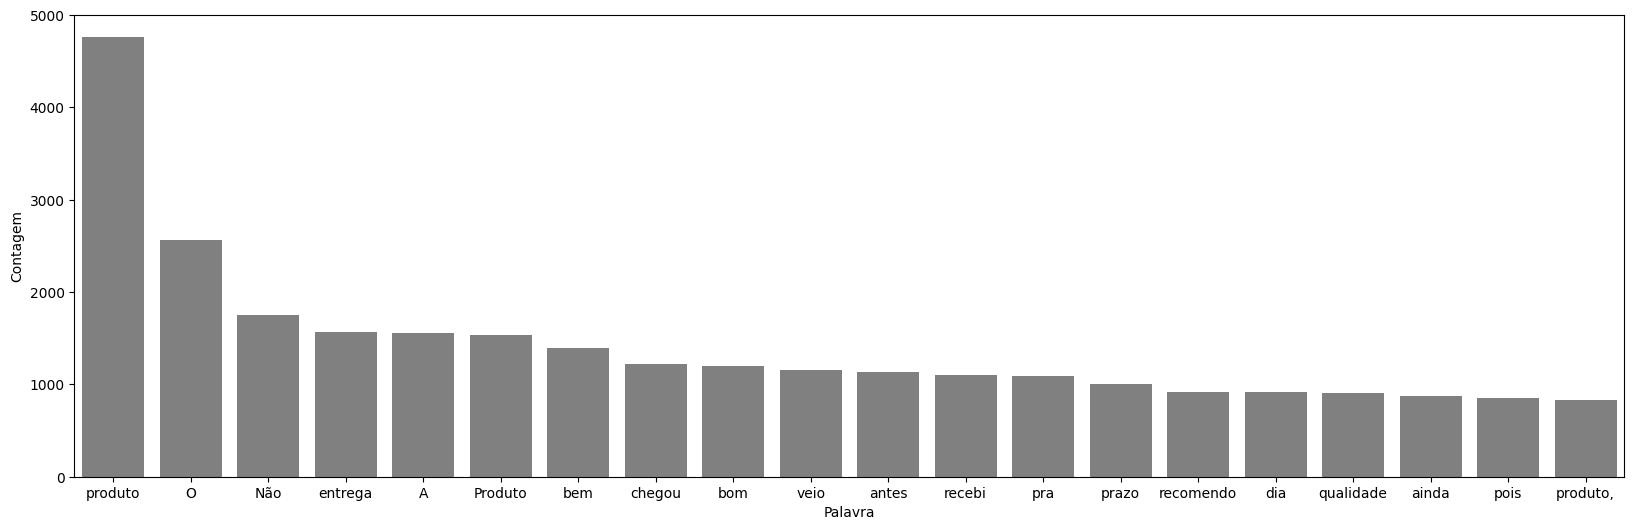

In [78]:
grafico_frequencia(df, 'tratamento_1', 20)

In [82]:
# Example
frase = 'Esse smartphone superou expectativas, recomendo'

token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)
print(token_frase)

['Esse', 'smartphone', 'superou', 'expectativas', ',', 'recomendo']


In [83]:
frase_processada = []

for opiniao in df['tratamento_1']:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra.isalpha() and palavra not in palavras_irrelevantes]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_2'] = frase_processada

In [84]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  
0     Esse smartphone superou expectativas recomendo  
1    cheiro desagradavel pra incomoda nao recomendoo  
2  Eu fiz compra loja entregou produto compra fei...  
3  Atendeu expectativas achei luz ruim nada dific...  
4  Gostei achei ficou desejar qualidade fotos Ach...

In [85]:
df['tratamento_1'][10]

'Melhor esperado, cor maravilhosa! Recomendo. Deixa ambiente moderno'

In [86]:
df['tratamento_2'][10]

'Melhor esperado cor maravilhosa Recomendo Deixa ambiente moderno'

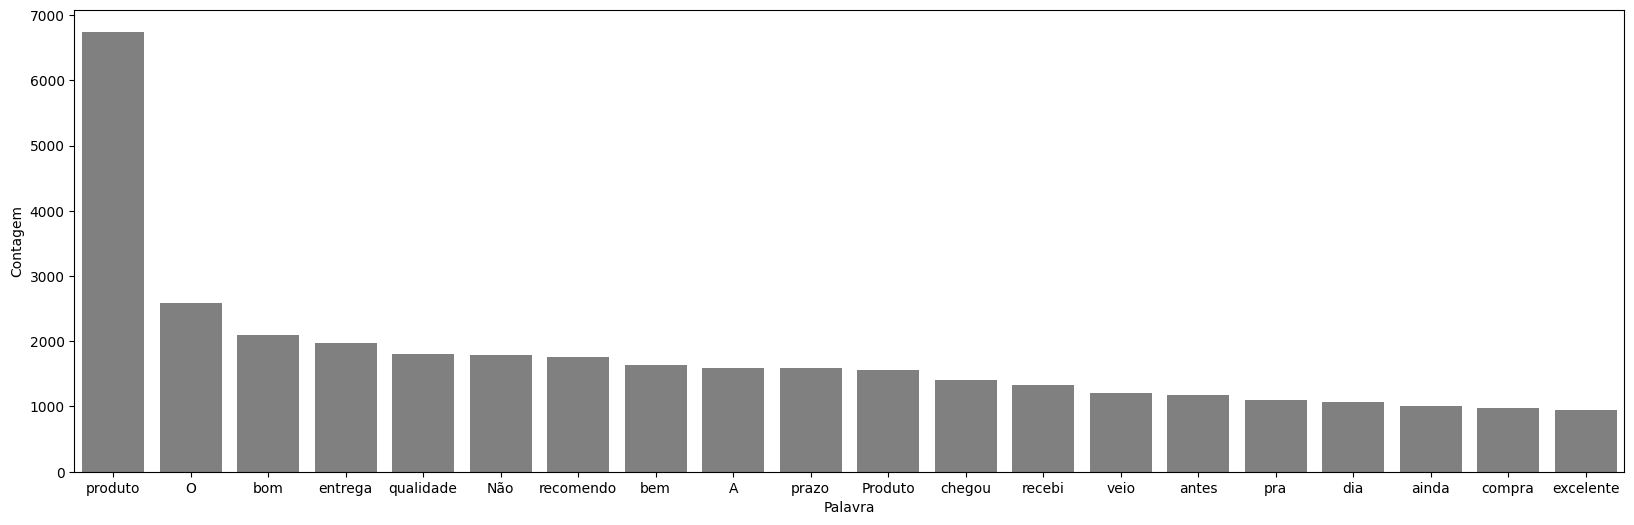

In [87]:
grafico_frequencia(df, 'tratamento_2', 20)

In [88]:
! pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 14.4 MB/s eta 0:00:00


In [89]:
import unidecode
# Example test
frase = 'Um aparelho ótima performance preço bem menor outros aparelhos marcas conhecidas performance semelhante'

teste = unidecode.unidecode(frase)
print(teste)

Um aparelho otima performance preco bem menor outros aparelhos marcas conhecidas performance semelhante


In [90]:
sem_acentos = [unidecode.unidecode(texto) for texto in df['tratamento_2']]

In [91]:
stopwords_sem_acento = [unidecode.unidecode(texto) for texto in palavras_irrelevantes]

In [94]:
df['tratamento_3'] = sem_acentos

frase_processada = []

for opiniao in df['tratamento_3']:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_3'] = frase_processada

In [95]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_3  
0     Esse smartphone superou expectativas recomendo  
1        cheiro desagradavel pra incomoda recomendoo  
2  Eu fiz compra loja entregou produto compra fei...  
3  Atendeu expectativas achei luz ruim nada dific...  
4  Gostei achei ficou desejar qualidade fotos Ach...

In [96]:
df['tratamento_2'][70]

'Melhor compra fiz últimos tempos Produto barato útil Produto robusto leve O teclado proporciona digitação confortável mouse preciso O teclado mouse usam apenas receptor economizando número portas USB computador Me livrei incomodo fios espaço trabalho ficou limpo harmonioso Ademais tudo parece bastante durável safisfeito Recomendo todos'

In [97]:
df['tratamento_3'][70]

'Melhor compra fiz ultimos tempos Produto barato util Produto robusto leve O teclado proporciona digitacao confortavel mouse preciso O teclado mouse usam apenas receptor economizando numero portas USB computador Me livrei incomodo fios espaco trabalho ficou limpo harmonioso Ademais tudo parece bastante duravel safisfeito Recomendo todos'

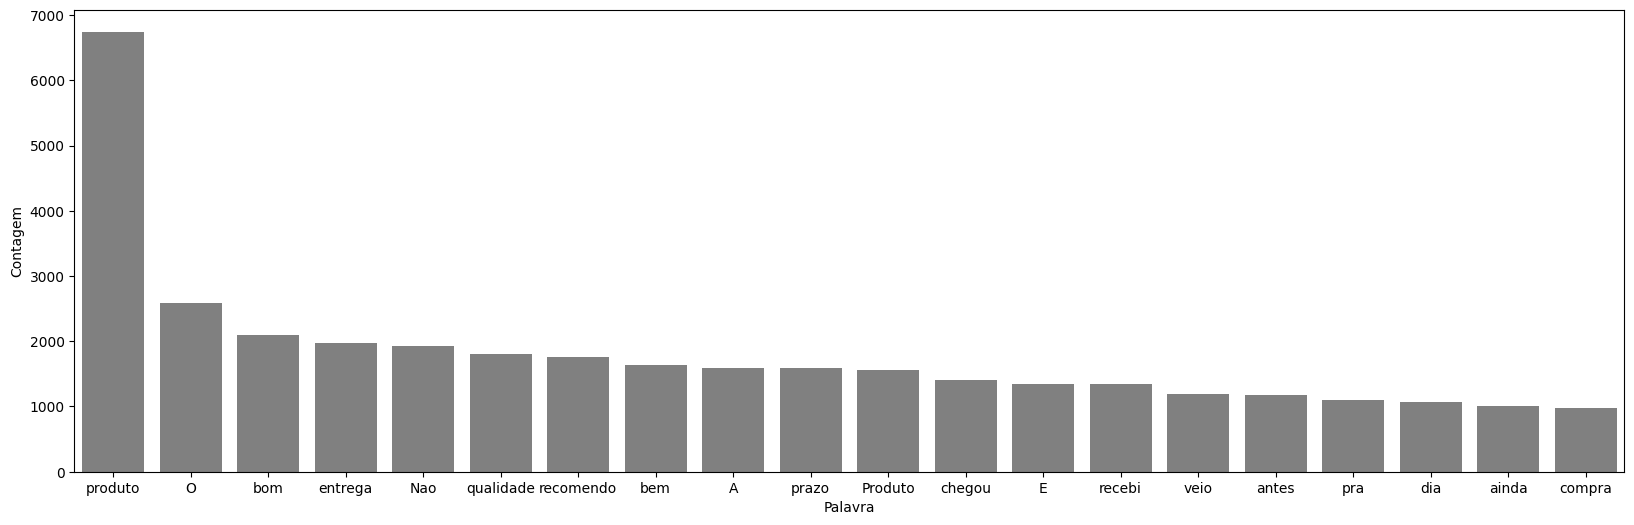

In [98]:
grafico_frequencia(df, 'tratamento_3', 20)

In [100]:
# Example
frase = 'Bom produto otimo custo beneficio Recomendo Confortavel bem acabado'
print(frase.lower())

bom produto otimo custo beneficio recomendo confortavel bem acabado


In [102]:
frase_processada = []

for opiniao in df['tratamento_3']:
  opiniao = opiniao.lower()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [palavra for palavra in palavras_texto if palavra not in stopwords_sem_acento]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_4'] = frase_processada

In [103]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_3  \
0     Esse smartphone superou expectativas recomendo   
1        cheiro desagradavel pra incomoda recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_4  
0          smartphone superou expectativas recomendo  
1        cheiro desagradavel pra incomoda recomendoo  
2  fiz compra loja entregou produto compra feita ...  
3  atendeu expectativas achei luz ruim nada dific...  
4  gostei achei ficou desejar qualidade fotos ach...

In [104]:
df['tratamento_3'][3]

'Atendeu expectativas achei luz ruim nada dificulte funcionamento'

In [105]:
df['tratamento_4'][3]

'atendeu expectativas achei luz ruim nada dificulte funcionamento'

In [106]:
classificar_texto(df, 'tratamento_4', 'sentimento')

Acurácia do modelo com 'tratamento_4': 83.746130%


In [108]:
stemmer = nltk.RSLPStemmer()
# Example
stemmer.stem('gostei')

'gost'

In [111]:
frase_processada = []

for opiniao in df['tratamento_4']:
  palavras_texto = token_pontuacao.tokenize(opiniao)
  nova_frase = [stemmer.stem(palavra) for palavra in palavras_texto]
  frase_processada.append(' '.join(nova_frase))

df['tratamento_5'] = frase_processada

In [112]:
df.head()

ID_avaliacao                                          avaliacao  nota  \
0         81841  Esse smartphone superou minhas expectativas, r...     5   
1         28031  o cheiro e muito desagradavel!! pra quem se in...     2   
2         91332  Eu fiz a compra a loja não entregou o produto,...     1   
3        110045  Atendeu minhas expectativas, só achei a luz ru...     4   
4         36929  Gostei muito, só achei que ficou a desejar a q...     5   

  sentimento                                       tratamento_1  \
0   positivo    Esse smartphone superou expectativas, recomendo   
1   negativo  cheiro desagradavel!! pra incomoda nao recomen...   
2   negativo  Eu fiz compra loja entregou produto, compra fe...   
3   positivo  Atendeu expectativas, achei luz ruim, nada dif...   
4   positivo  Gostei muito, achei ficou desejar qualidade fo...   

                                        tratamento_2  \
0     Esse smartphone superou expectativas recomendo   
1    cheiro desagradavel pra incomoda nao recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_3  \
0     Esse smartphone superou expectativas recomendo   
1        cheiro desagradavel pra incomoda recomendoo   
2  Eu fiz compra loja entregou produto compra fei...   
3  Atendeu expectativas achei luz ruim nada dific...   
4  Gostei achei ficou desejar qualidade fotos Ach...   

                                        tratamento_4  \
0          smartphone superou expectativas recomendo   
1        cheiro desagradavel pra incomoda recomendoo   
2  fiz compra loja entregou produto compra feita ...   
3  atendeu expectativas achei luz ruim nada dific...   
4  gostei achei ficou desejar qualidade fotos ach...   

                                        tratamento_5  
0                       smartphon super expect recom  
1              cheir desagrada pra incomod recomendo  
2  fiz compr loj entreg produt compr feit carta c...  
3     atend expect ach luz ruim nad dificult funcion  
4         gost ach fic desej qual fot ach bem melhor

In [113]:
df['tratamento_4'][3]

'atendeu expectativas achei luz ruim nada dificulte funcionamento'

In [114]:
df['tratamento_5'][3]

'atend expect ach luz ruim nad dificult funcion'

In [121]:
classificar_texto(df, 'tratamento_5', 'sentimento')

Acurácia do modelo com 'tratamento_5': 85.11%


In [117]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Example
frases = ['Comprei um ótimo produto', 'Comprei um produto péssimo']

tfidf = TfidfVectorizer(lowercase=False, max_features=50)
matriz = tfidf.fit_transform(frases)
pd.DataFrame(matriz.todense(),
             columns=tfidf.get_feature_names_out())

Comprei   produto   péssimo        um     ótimo
0  0.448321  0.448321  0.000000  0.448321  0.630099
1  0.448321  0.448321  0.630099  0.448321  0.000000

In [118]:
tfidf_bruto = tfidf.fit_transform(df['avaliacao'])
x_treino, x_teste, y_treino, y_teste = train_test_split(tfidf_bruto, df['sentimento'], random_state=4978)
regressao_logistica.fit(x_treino, y_treino)
acuracia_tfidf_bruto = regressao_logistica.score(x_teste, y_teste)
print(f'Acurácia do modelo: {acuracia_tfidf_bruto *100:.2f}%')

Acurácia do modelo: 79.54%


In [122]:
tfidf_tratados = tfidf.fit_transform(df['tratamento_5'])
x_treino, x_teste, y_treino, y_teste = train_test_split(tfidf_tratados, df['sentimento'], random_state=4978)
regressao_logistica.fit(x_treino, y_treino)
acuracia_tfidf_tratados = regressao_logistica.score(x_teste, y_teste)
print(f'Acurácia do modelo: {acuracia_tfidf_tratados *100:.2f}%')

Acurácia do modelo: 85.14%


In [123]:
from nltk import ngrams
# Example

frase = 'Comprei um produto ótimo'
frase_separada = token_espaco.tokenize(frase)
pares = ngrams(frase_separada, 2)
list(pares)

[('Comprei', 'um'), ('um', 'produto'), ('produto', 'ótimo')]

In [124]:
tfidf_50 = TfidfVectorizer(lowercase=False, max_features=50, ngram_range=(1,2))
vetor_tfidf = tfidf_50.fit_transform(df['tratamento_5'])
x_treino, x_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressao_logistica.fit(x_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(x_teste, y_teste)
print(f'Acurácia do modelo com 50 features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

Acurácia do modelo com 50 features e ngrams: 85.22%


In [125]:
tfidf_100 = TfidfVectorizer(lowercase=False, max_features=100, ngram_range=(1,2))
vetor_tfidf = tfidf_100.fit_transform(df['tratamento_5'])
x_treino, x_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressao_logistica.fit(x_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(x_teste, y_teste)
print(f'Acurácia do modelo com 100 features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

Acurácia do modelo com 100 features e ngrams: 88.26%


In [135]:
tfidf_1000 = TfidfVectorizer(lowercase=False, max_features=1000, ngram_range=(1,2))
vetor_tfidf = tfidf_1000.fit_transform(df['tratamento_5'])
x_treino, x_teste, y_treino, y_teste = train_test_split(vetor_tfidf, df['sentimento'], random_state=4978)
regressao_logistica.fit(x_treino, y_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(x_teste, y_teste)
print(f'Acurácia do modelo com 1000 features e ngrams: {acuracia_tfidf_ngrams * 100:.2f}%')

Acurácia do modelo com 1000 features e ngrams: 91.85%


In [137]:
pesos = pd.DataFrame(regressao_logistica.coef_[0].T, index=tfidf_1000.get_feature_names_out())

In [138]:
pesos.nlargest(50, 0)

0
otim          7.781088
excel         7.430921
bom           5.996893
perfeit       5.086188
ador          5.050502
satisfeit     4.841244
rap           4.109015
lind          3.774459
ame           3.513963
maravilh      3.490755
boa           2.829414
expect        2.798364
bast          2.788131
surpreend     2.764640
recom         2.753083
sup           2.718365
gost          2.687683
bem           2.593884
facil         2.547190
conhec        2.497850
exat          2.463261
otim produt   2.277315
ant           2.258327
parab         2.248767
top           2.239296
ant praz      2.196812
obrig         2.117297
bonit         2.061114
facilit       2.020424
ideal         2.010913
amou          2.005031
gost produt   1.933271
produt excel  1.894760
unic          1.861372
necess        1.856329
atend         1.816194
incri         1.805830
tud           1.772397
bom produt    1.764410
acord         1.724740
cheg ant      1.689839
conform       1.687745
feliz         1.681016
produt otim   1.660550
sup recom     1.612914
melhor        1.597468
produt bom    1.556537
util          1.537668
cert          1.534174
duvid         1.527281

In [139]:
pesos.nsmallest(50, 0)

0
pess         -4.644158
ruim         -4.068716
receb        -4.062899
frac         -3.716810
horri        -3.379785
fragil       -3.038980
defeit       -3.036871
devolv       -2.935014
decepcion    -2.896531
dinh         -2.701120
vei          -2.661457
pag          -2.417057
solt         -2.382961
quebr        -2.336582
ning         -2.293246
me           -2.254337
pess qual    -2.237873
receb produt -2.171011
tent         -2.130810
devoluca     -2.109201
baix         -2.108521
inferi       -2.075952
avali        -2.071335
insatisfeit  -2.055346
lig          -2.037635
rasg         -2.002702
baix qual    -1.975732
troc         -1.952776
lent         -1.895730
queim        -1.889311
fal          -1.857996
arrepend     -1.843681
fech         -1.835485
tr           -1.829849
fot          -1.813119
porc         -1.809079
hoj          -1.786504
cancel       -1.776376
mand         -1.771028
pi           -1.759046
sai          -1.758597
encaix       -1.746334
err          -1.736356
absurd       -1.723272
produt       -1.718758
mes          -1.689650
nad          -1.687022
mal          -1.680979
plac         -1.668312
diz          -1.642745

In [141]:
import joblib

joblib.dump(tfidf_1000, 'tfidf_vectorizer.pkl')
joblib.dump(regressao_logistica, 'modelo_regressao_logistica.pkl')

['modelo_regressao_logistica.pkl']

In [142]:
tfidf = joblib.load('tfidf_vectorizer.pkl')
regressao_logistica = joblib.load('modelo_regressao_logistica.pkl')

In [143]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
token_pontuacao = tokenize.WordPunctTokenizer()
stemmer = nltk.RSLPStemmer()

def processar_avaliacao(avaliacao):
  # passo 1
  tokens = token_pontuacao.tokenize(avaliacao)

  # passo 2
  frase_processada = [palavra for palavra in tokens if palavra.lower() not in palavras_irrelevantes]

  # passo 3
  frase_processada = [palavra for palavra in frase_processada if palavra.isalpha()]

  # passo 4
  frase_processada = [unidecode.unidecode(palavra) for palavra in frase_processada]

  # passo 5
  frase_processada = [stemmer.stem(palavra) for palavra in frase_processada]

  return ' '.join(frase_processada)

In [144]:
# Novas avaliações para prever:
novas_avaliacoes = ["Ótimo produto, super recomendo!",
                    "A entrega atrasou muito! Estou decepcionado com a compra.",
                    "Muito satisfeito com a compra. Além de ter atendido as expectativas, o preço foi ótimo.",
                    "Horrível!!! O produto chegou danificado e agpra estou tentando fazer a devolução."]

In [145]:
novas_avaliacoes_processadas = [processar_avaliacao(avaliacao) for avaliacao in novas_avaliacoes]

In [146]:
novas_avaliacoes_processadas

['otim produt sup recom',
 'entreg atras decepcion compr',
 'satisfeit compr alem ter atend expect prec otim',
 'horri produt cheg danific agpr tent faz devoluca']

In [147]:
novas_avaliacoes_tfidf = tfidf.transform(novas_avaliacoes_processadas)

predicoes = regressao_logistica.predict(novas_avaliacoes_tfidf)

df_previsoes = pd.DataFrame({
    'Avaliação': novas_avaliacoes,
    'Sentimento previsto': predicoes
})

df_previsoes

Avaliação Sentimento previsto
0                    Ótimo produto, super recomendo!            positivo
1  A entrega atrasou muito! Estou decepcionado co...            negativo
2  Muito satisfeito com a compra. Além de ter ate...            positivo
3  Horrível!!! O produto chegou danificado e agpr...            negativo